# Signals and Systems for Dummies, Chapter 9

In [1]:
from pathlib import Path
import sys

if (root := str(Path().resolve().parent.parent / "python")) not in sys.path:
    sys.path.append(root)
print(*sys.path, sep="\n")

import numpy as np
from scipy import signal, fft
import matplotlib.pyplot as plt
from matplotlib import rcParams
import math
from rfdsppy import continuous_time as conttime, plotting
# import mplcursors

from importlib import reload

reload(conttime)
reload(plotting)

# %matplotlib ipympl
%matplotlib inline

/usr/lib/python312.zip
/usr/lib/python3.12
/usr/lib/python3.12/lib-dynload

/home/ryanwtsai/repos/rfdsp_sim/python/venv/lib/python3.12/site-packages
/home/ryanwtsai/repos/rfdsp_sim/python


Text(0.5, 0, 'Frequency (Hz)')

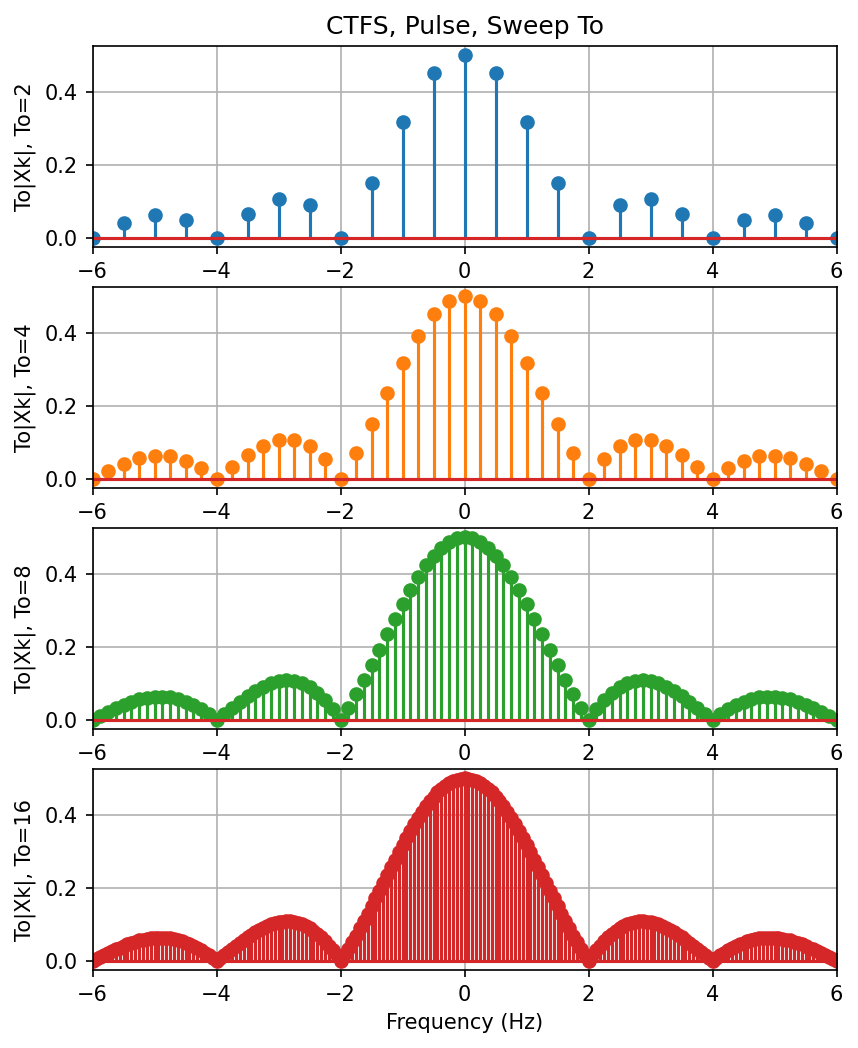

In [25]:
A = 1
tau = 0.5

fig, axs = plt.subplots(nrows=4, sharex=True, dpi=150, figsize=(6.4, 8))
for idx, To in enumerate(2**np.array([1, 2, 3, 4])):
    fo = 1/To

    per_pulse_gen = conttime.CTPeriodicSigGen(A=A, fo=fo, To=To, tau=tau)
    f, Xk = per_pulse_gen.calc_fourier_series_coef()
    axs[idx].stem(f, To*np.abs(Xk), linefmt=f"C{idx}")
    axs[idx].set_ylabel(f"To|Xk|, To={To}")
    axs[idx].tick_params(labelbottom=True)
    axs[idx].grid()

axs[0].set_title("CTFS, Pulse, Sweep To")
axs[-1].set_xlim(left=-3/tau, right=3/tau)
axs[-1].set_xlabel("Frequency (Hz)")